In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [30]:
fleet = pd.read_excel('10_1_Class 8 Fleet Data.xlsx', header=0)
fleet.drop(index=fleet.index[0], inplace=True)

In [31]:
fleet.head()

,Unnamed: 0,Samp. #,Fuel,Soot,Visc,Acid #,Base #,Oxidation,Nitration,Iron,Lead,Copper,Chro,Aluminum,Silicon,Sodium,Potassium,Fuel.1
1,1,1.0,0.5,0.1,14.1,5.49,4.53,18,24,32,7,1,1,8,6,3,1,#2ULSD
2,1,2.0,0.5,0.1,14.3,4.85,4.49,14,20,25,4,0,1,6,2,3,2,#2ULSD
3,1,3.0,0.5,0.1,15.1,3.43,4.69,14,19,26,5,0,1,5,3,2,1,#2ULSD
4,1,4.0,0.5,0.2,14.6,4.76,4.63,13,18,23,5,1,1,5,5,4,1,#2ULSD
5,1,5.0,1.2,0.3,14.8,5.89,3.87,20,27,39,14,1,1,7,6,6,1,#2ULSD


In [40]:
fleet.describe()

,Samp. #
count,111.00000
mean,28.27027
std,16.12674
min,1.00000
25%,14.50000
50%,28.00000
75%,42.00000
max,57.00000


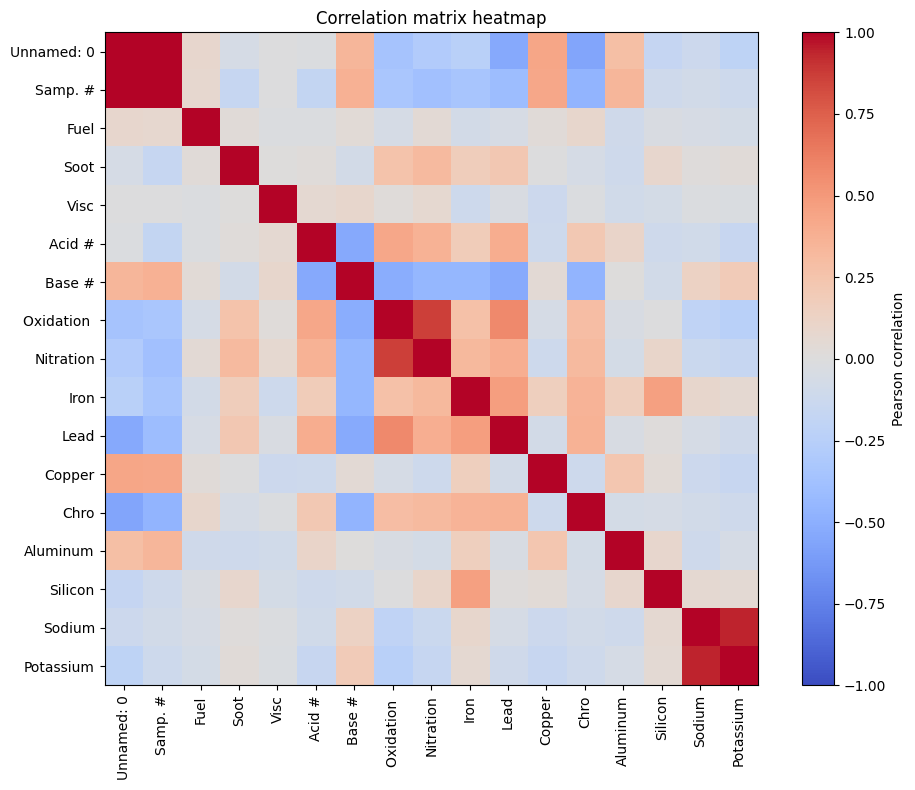

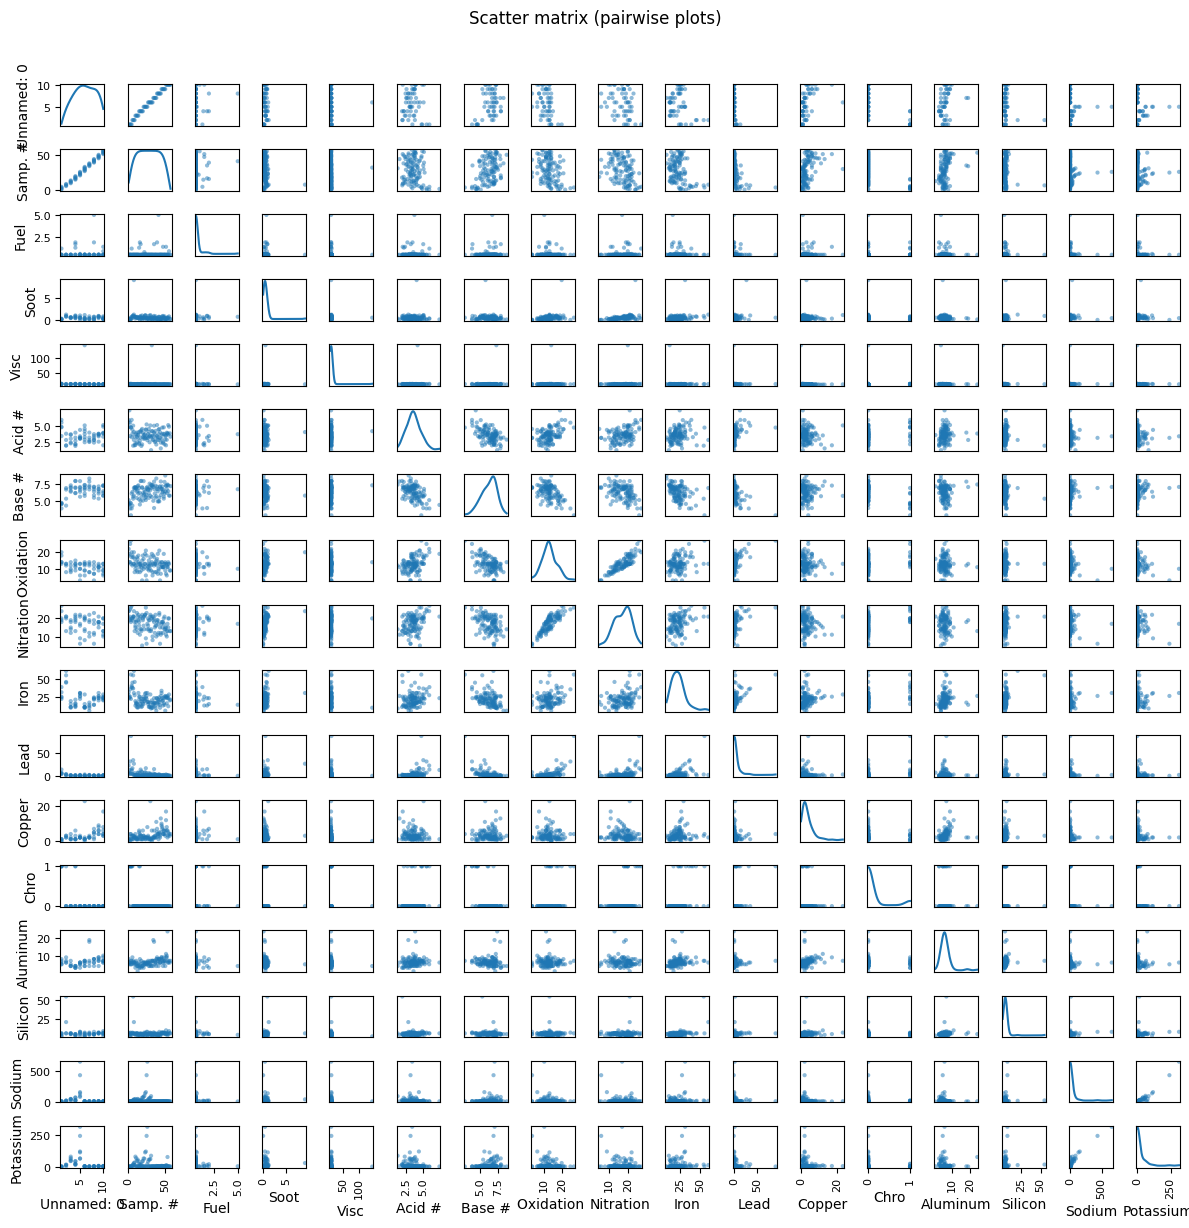

In [39]:
# convert non-numeric values to NaN and compute correlations
numeric = fleet.apply(pd.to_numeric, errors='coerce')

# correlation matrix (drop all-empty columns first)
corr = numeric.dropna(axis=1, how='all').corr()

# heatmap of correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Pearson correlation')
cols = corr.columns
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)
plt.title('Correlation matrix heatmap')
plt.tight_layout()
plt.show()

# pairwise scatter matrix for numeric columns
pd.plotting.scatter_matrix(numeric.dropna(axis=1, how='all'), figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter matrix (pairwise plots)', y=1.02)
plt.tight_layout()
plt.show()